## Libraries we used for the report

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataframe

Scottish Energy Performance Certificate Register
Publication of Energy Performance Data for Domestic Buildings
Dataset – Q4 2012 to Q1 2022 – March 2022
https://market.oceanprotocol.com/asset/did:op:2c586b710625b6ef2899b0c690d2a350a1c6c428669c35fd75400f01debbf830

In [2]:
dataframe = pd.read_csv("/kaggle/input/energy-efficiency-data-challenge/Scotland EPC Dataset.csv")

In [3]:
dataframe.head()

,Property_UPRN,Postcode,POST_TOWN,Date of Assessment,Primary Energy Indicator (kWh/m²/year),Total floor area (m²),Current energy efficiency rating,Current energy efficiency rating band,Potential Energy Efficiency Rating,Potential energy efficiency rating band,...,Total current energy costs over 3 years (£),Current heating costs over 3 years (£),Potential heating costs over 3 years (£),Current hot water costs over 3 years (£),Potential hot water costs over 3 years (£),Current lighting costs over 3 years (£),Potential lighting costs over 3 years (£),Part 1 Construction Age Band,Built Form,Property Type
0,1.001101e+09,EH4 5EZ,EDINBURGH,01/01/2021,375.0,94.0,53.0,E,85.0,B,...,3789.0,2922.0,1548.0,645.0,219.0,222.0,222.0,1930-1949,Semi-Detached,House
1,1.001951e+09,EH7 4HE,EDINBURGH,01/01/2021,250.0,175.0,66.0,D,80.0,C,...,4635.0,4068.0,3015.0,246.0,246.0,321.0,321.0,1919-1929,End-Terrace,House
2,1.000996e+09,EH4 2DL,EDINBURGH,02/01/2021,403.0,72.0,61.0,D,78.0,C,...,3570.0,2226.0,1191.0,1038.0,564.0,306.0,207.0,1965-1975,Semi-Detached,Flat
3,1.001257e+09,PH1 1SA,PERTH,02/01/2021,174.0,96.0,76.0,C,87.0,B,...,2049.0,1554.0,1554.0,258.0,177.0,237.0,237.0,1999-2002,Mid-Terrace,House
4,1.235709e+09,G78 1QN,Glasgow,02/01/2021,145.0,58.0,79.0,C,79.0,C,...,1212.0,828.0,828.0,216.0,216.0,168.0,168.0,before 1919,Mid-Terrace,Flat


Next, we cleane the dataset from extraspaces and removed spelling errors in town names

In [4]:
dataframe.POST_TOWN = dataframe.POST_TOWN.str.strip()
dataframe.POST_TOWN = dataframe.POST_TOWN.str.upper()
dataframe.POST_TOWN = dataframe.POST_TOWN.replace("ACHARCLE", "ACHARACLE").replace("ARGYLL &AMP; BUTE","ARGYLL AND BUTE").replace("BRECHIN, ANGUS","BRECHIN").replace("CAMPBE;TOWN","CAMPBELTOWN").replace("CASLTE DOUGLAS","CASTLE DOUGLAS").replace("STORNAWAY","STORNOWAY").replace("SOUTH ARYSHIRE","SOUTH AYRSHIRE").replace("SHETLAND ISLANDS","SHETLAND").replace("ROYBRIDGE","ROY BRIDGE").replace("PERTH &AMP; KINROSS", "PERTH").replace("ORMITSTON", "ORMISTON").replace("NORTH ARYSHIRE","NORTH AYRSHIRE").replace("NEWTON MERANS","NEWTON MEARNS").replace("NEWPORT-ON-TAY","NEWPORT ON TAY").replace("MUSSLEBURGH","MUSSELBURGH").replace("LEVEN, FIFE", "LEVEN").replace("ISLE OF SCALPY", "ISLE OF SCALPAY").replace("GRANTOWN ON SPEY","GRANTOWN-ON-SPEY").replace("GRANTON-ON-SPEY","GRANTOWN-ON-SPEY").replace("GRANTON ON SPEY","GRANTOWN-ON-SPEY").replace("EDINGBURGH", "EDINBURGH")

## Descriptive statistics of the dataset

In [5]:
dataframe.describe()

,Property_UPRN,Primary Energy Indicator (kWh/m²/year),Total floor area (m²),Current energy efficiency rating,Potential Energy Efficiency Rating,Current Environmental Impact Rating,Potential Environmental Impact Rating,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),Current Emissions (T.CO2/yr),Potential Reduction in Emissions (T.CO2/yr),Total current energy costs over 3 years (£),Current heating costs over 3 years (£),Potential heating costs over 3 years (£),Current hot water costs over 3 years (£),Potential hot water costs over 3 years (£),Current lighting costs over 3 years (£),Potential lighting costs over 3 years (£)
count,1.850390e+05,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000,185039.000000
mean,1.053923e+09,248.665157,88.522128,69.191797,82.189511,67.137128,80.458914,44.384972,3.799927,1.565072,2691.063084,2033.206416,1480.955393,404.849691,281.331692,253.006977,215.394711
std,9.780732e+07,144.397097,49.246079,13.578025,7.987645,16.173906,10.408101,26.192351,3.369697,2.246415,2076.714794,1886.857082,1066.420023,289.961225,151.211792,100.134687,71.690024
min,1.000002e+09,-858.000000,15.000000,1.000000,2.000000,1.000000,13.000000,-159.000000,-22.700000,-0.600000,312.000000,57.000000,57.000000,0.000000,0.000000,57.000000,57.000000
25%,1.000734e+09,160.000000,62.000000,63.000000,78.000000,58.000000,76.000000,28.000000,2.000000,0.300000,1557.000000,1047.000000,870.000000,246.000000,198.000000,186.000000,171.000000
50%,1.001543e+09,227.000000,77.000000,71.000000,82.000000,69.000000,82.000000,40.000000,3.000000,1.100000,2151.000000,1557.000000,1221.000000,291.000000,237.000000,234.000000,207.000000
75%,1.002494e+09,303.000000,99.000000,78.000000,87.000000,78.000000,87.000000,55.000000,4.500000,1.900000,3093.000000,2346.000000,1738.500000,441.000000,300.000000,300.000000,249.000000
max,1.235956e+09,3378.000000,1498.000000,268.000000,291.000000,262.000000,282.000000,585.000000,410.000000,402.700000,180036.000000,176205.000000,50484.000000,4071.000000,2532.000000,2220.000000,2526.000000


### The top 25 Post Towns by occurences are:

In [6]:
dataframe["POST_TOWN"].value_counts().head(25)

GLASGOW        37529
EDINBURGH      19276
ABERDEEN        9226
DUNDEE          5782
PAISLEY         3136
DUNFERMLINE     3011
PERTH           2965
INVERNESS       2877
STIRLING        2548
FALKIRK         2387
KILMARNOCK      2227
AYR             2137
HAMILTON        1995
MOTHERWELL      1939
LIVINGSTON      1922
KIRKCALDY       1775
GREENOCK        1709
AIRDRIE         1701
DUMFRIES        1692
COATBRIDGE      1536
BATHGATE        1507
ELGIN           1373
PETERHEAD       1321
WISHAW          1247
CLYDEBANK       1212
Name: POST_TOWN, dtype: int64

On average a post town has 286 occurences in the data:

In [7]:
dataframe["POST_TOWN"].value_counts().mean()

286.06366459627327

While a median town has 8 occurences

In [8]:
dataframe["POST_TOWN"].value_counts().median()

8.0

We also find that there is a large amount of single town occurences in the data, for instance, at least 25% of observations belong to unique postal towns

In [9]:
np.quantile(dataframe["POST_TOWN"].value_counts(), 0.25)

1.0

Hence, we decided to report multiple statistics: average observation for all postal towns(which favors unique exteme values), sum of all data (which favors agglomerates), as well as statistics dedicated to postal towns with observations equal or higher than 8, which should provide the less bias findings.

1. Rank Towns by current efficiency rating - (2 points)

In [10]:
current_efficiency_dict = {
    'Current energy efficiency rating': [np.median, np.mean, 'count', 'sum'],
}

df_current_efficiency = dataframe.groupby(['POST_TOWN']).agg(current_efficiency_dict).sort_values(ascending=False, by=[('Current energy efficiency rating',   'mean')])
df_current_efficiency.head(5)

Current energy efficiency rating                          
                                             median        mean count     sum
POST_TOWN                                                                    
GARTOCHARN                                    115.0  115.000000     1   115.0
BANNOCKBURN                                   114.5  111.750000     4   447.0
GATEHOUSE OF FLEET                            101.0  101.000000     1   101.0
NORTH LANARKSHIRE                              97.0   97.117647    17  1651.0
AULDEARN                                       96.0   96.000000     1    96.0

In [11]:
df_current_efficiency.sort_values(ascending=False, by=[('Current energy efficiency rating',   'sum')]).head(5)

Current energy efficiency rating                             
                                    median       mean  count        sum
POST_TOWN                                                              
GLASGOW                               73.0  71.073863  37529  2667331.0
EDINBURGH                             72.0  70.927682  19276  1367202.0
ABERDEEN                              71.0  69.753089   9226   643542.0
DUNDEE                                71.0  69.004151   5782   398982.0
PAISLEY                               73.0  71.469707   3136   224129.0

In [12]:
df_current_efficiency.loc[(df_current_efficiency[('Current energy efficiency rating','count')] >= 8)].sort_values(ascending=False, by=[('Current energy efficiency rating',   'mean')]).head(5)

Current energy efficiency rating                         
                                            median       mean count     sum
POST_TOWN                                                                  
NORTH LANARKSHIRE                             97.0  97.117647    17  1651.0
WALLYFORD                                     91.0  89.826087    23  2066.0
GLENMAVIS                                     90.0  89.521739    23  2059.0
METHIL                                        89.0  89.437500    16  1431.0
WINCHBURGH                                    91.0  89.419355    31  2772.0

2. Rank Towns by potential energy efficiency rating - (2 points)

In [13]:
potential_efficiency_dict = {
    'Potential Environmental Impact Rating': [np.median, np.std, np.mean, 'count', 'sum'],
}


df_potential_efficiency = dataframe.groupby(['POST_TOWN']).agg(potential_efficiency_dict).sort_values(ascending=False, by=[('Potential Environmental Impact Rating',   'mean')])
df_potential_efficiency.head(5)

Potential Environmental Impact Rating                        
                                          median std   mean count    sum
POST_TOWN                                                               
WEST PLEAN                                 126.0 NaN  126.0     1  126.0
MEIGLE                                     122.0 NaN  122.0     1  122.0
COMRIE                                     121.0 NaN  121.0     1  121.0
GARTOCHARN                                 117.0 NaN  117.0     1  117.0
SANDAY                                     117.0 NaN  117.0     1  117.0

In [14]:
df_potential_efficiency.sort_values(ascending=False, by=[('Potential Environmental Impact Rating',   'sum')]).head(5)

Potential Environmental Impact Rating                               \
                                         median        std       mean  count   
POST_TOWN                                                                      
GLASGOW                                    81.0   9.443690  79.705055  37529   
EDINBURGH                                  81.0   9.536754  79.502023  19276   
ABERDEEN                                   81.0   9.379837  79.722957   9226   
DUNDEE                                     81.0  10.152283  78.899862   5782   
PAISLEY                                    81.0   9.423686  80.338648   3136   

                      
                 sum  
POST_TOWN             
GLASGOW    2991251.0  
EDINBURGH  1532481.0  
ABERDEEN    735524.0  
DUNDEE      456199.0  
PAISLEY     251942.0

In [15]:
df_potential_efficiency.loc[(df_potential_efficiency[('Potential Environmental Impact Rating','count')] >= 8)].sort_values(ascending=False, by=[('Potential Environmental Impact Rating',   'mean')]).head(5)

Potential Environmental Impact Rating                       \
                                                 median       std       mean   
POST_TOWN                                                                      
NORTH LANARKSHIRE                                 100.0  1.477777  99.941176   
MACHLINE                                           97.0  1.327368  96.809524   
SOUTH AYRSHIRE                                     95.0  7.510707  95.125000   
LUGAR                                              97.0  6.008328  95.100000   
ARDERSIER                                          98.0  6.196862  94.357143   

                                 
                  count     sum  
POST_TOWN                        
NORTH LANARKSHIRE    17  1699.0  
MACHLINE             21  2033.0  
SOUTH AYRSHIRE        8   761.0  
LUGAR                10   951.0  
ARDERSIER            14  1321.0

Here we find that NORTH LANARKSHIRE is a clear leader in both current efficiency rating and potential energy efficiency

3. Rank Towns by current environmental impact rating and note if there have been periods where houses were more or less environmentally friendly- (2 points)

In [16]:
current_env_dict = {
    'Current Environmental Impact Rating': [np.median, np.std, np.mean, 'count', 'sum'],
}

df_current_env = dataframe.groupby(['POST_TOWN']).agg(current_env_dict).sort_values(ascending=False, by=[('Current Environmental Impact Rating',   'mean')])
df_current_env.head(5)

Current Environmental Impact Rating                        \
                                               median       std        mean   
POST_TOWN                                                                     
GARTOCHARN                                      113.0       NaN  113.000000   
BANNOCKBURN                                     112.0  6.130525  109.750000   
NORTH LANARKSHIRE                                99.0  2.468925   98.705882   
AULDEARN                                         96.0       NaN   96.000000   
WESTERN ISLES                                    96.0       NaN   96.000000   

                                 
                  count     sum  
POST_TOWN                        
GARTOCHARN            1   113.0  
BANNOCKBURN           4   439.0  
NORTH LANARKSHIRE    17  1678.0  
AULDEARN              1    96.0  
WESTERN ISLES         1    96.0

In [17]:
df_current_env.sort_values(ascending=False, by=[('Current Environmental Impact Rating',   'sum')]).head(5)

Current Environmental Impact Rating                               \
                                       median        std       mean  count   
POST_TOWN                                                                    
GLASGOW                                  71.0  13.970218  69.543153  37529   
EDINBURGH                                71.0  14.814219  69.462855  19276   
ABERDEEN                                 70.0  14.384589  68.005636   9226   
DUNDEE                                   68.0  14.635000  66.440678   5782   
PAISLEY                                  71.0  14.047345  70.311862   3136   

                      
                 sum  
POST_TOWN             
GLASGOW    2609885.0  
EDINBURGH  1338966.0  
ABERDEEN    627420.0  
DUNDEE      384160.0  
PAISLEY     220498.0

In [18]:
df_current_env.loc[(df_current_env[('Current Environmental Impact Rating','count')] >= 8)].sort_values(ascending=False, by=[('Current Environmental Impact Rating',   'mean')]).head(5)

Current Environmental Impact Rating                       \
                                               median       std       mean   
POST_TOWN                                                                    
NORTH LANARKSHIRE                                99.0  2.468925  98.705882   
WALLYFORD                                        92.0  2.295381  91.217391   
METHIL                                           91.0  0.442531  91.062500   
ROXBURGHSHIRE                                    91.0  0.597001  90.950000   
GLENMAVIS                                        90.0  0.792754  90.086957   

                                 
                  count     sum  
POST_TOWN                        
NORTH LANARKSHIRE    17  1678.0  
WALLYFORD            23  2098.0  
METHIL               16  1457.0  
ROXBURGHSHIRE        40  3638.0  
GLENMAVIS            23  2072.0

We find NORTH LANARKSHIRE as a clear Leader

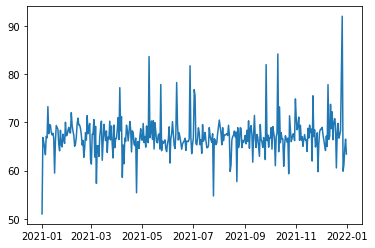

In [19]:
dataframe['Date of Assessment'] = pd.to_datetime(dataframe['Date of Assessment'])
plt.plot(dataframe.groupby(['Date of Assessment'])["Current Environmental Impact Rating"].mean())

In terms of date there are noticeable spikes in average rating, however the average observation data is somewhat stable across time.

4. Rank Towns by potential environmental impact rating - (2 points)

In [20]:
potential_env_dict = {
    'Potential Environmental Impact Rating': [np.median, np.std, np.mean, 'count', 'sum'],
}

df_potential_env = dataframe.groupby(['POST_TOWN']).agg(potential_env_dict).sort_values(ascending=False, by=[('Potential Environmental Impact Rating',   'mean')])
df_potential_env.head(5)

Potential Environmental Impact Rating                        
                                          median std   mean count    sum
POST_TOWN                                                               
WEST PLEAN                                 126.0 NaN  126.0     1  126.0
MEIGLE                                     122.0 NaN  122.0     1  122.0
COMRIE                                     121.0 NaN  121.0     1  121.0
GARTOCHARN                                 117.0 NaN  117.0     1  117.0
SANDAY                                     117.0 NaN  117.0     1  117.0

In [21]:
df_potential_env.sort_values(ascending=False, by=[('Potential Environmental Impact Rating',   'sum')]).head(5)

Potential Environmental Impact Rating                               \
                                         median        std       mean  count   
POST_TOWN                                                                      
GLASGOW                                    81.0   9.443690  79.705055  37529   
EDINBURGH                                  81.0   9.536754  79.502023  19276   
ABERDEEN                                   81.0   9.379837  79.722957   9226   
DUNDEE                                     81.0  10.152283  78.899862   5782   
PAISLEY                                    81.0   9.423686  80.338648   3136   

                      
                 sum  
POST_TOWN             
GLASGOW    2991251.0  
EDINBURGH  1532481.0  
ABERDEEN    735524.0  
DUNDEE      456199.0  
PAISLEY     251942.0

In [22]:
df_potential_env.loc[(df_potential_env[('Potential Environmental Impact Rating','count')] >= 8)].sort_values(ascending=False, by=[('Potential Environmental Impact Rating',   'mean')]).head(5)

Potential Environmental Impact Rating                       \
                                                 median       std       mean   
POST_TOWN                                                                      
NORTH LANARKSHIRE                                 100.0  1.477777  99.941176   
MACHLINE                                           97.0  1.327368  96.809524   
SOUTH AYRSHIRE                                     95.0  7.510707  95.125000   
LUGAR                                              97.0  6.008328  95.100000   
ARDERSIER                                          98.0  6.196862  94.357143   

                                 
                  count     sum  
POST_TOWN                        
NORTH LANARKSHIRE    17  1699.0  
MACHLINE             21  2033.0  
SOUTH AYRSHIRE        8   761.0  
LUGAR                10   951.0  
ARDERSIER            14  1321.0

5. Rank Towns by Current Emissions (T.CO2/yr) - (2 points)

In [23]:
current_emissions_dict = {
    'Current Emissions (T.CO2/yr)': [np.median, np.std, np.mean, 'count', 'sum'],
}

df_current_em = dataframe.groupby(['POST_TOWN']).agg(current_emissions_dict).sort_values(ascending=False, by=[('Current Emissions (T.CO2/yr)','mean')])
df_current_em.head(5)

Current Emissions (T.CO2/yr)                      
                                 median std  mean count   sum
POST_TOWN                                                    
BONAWE                             37.0 NaN  37.0     1  37.0
MORVERN                            31.0 NaN  31.0     1  31.0
FINDHORN                           26.0 NaN  26.0     1  26.0
KINCARDINE                         20.0 NaN  20.0     1  20.0
BY MAYBOLE                         19.0 NaN  19.0     1  19.0

In [24]:
df_current_em.sort_values(ascending=False, by=[('Current Emissions (T.CO2/yr)','sum')]).head(5)

Current Emissions (T.CO2/yr)                                     
                                median       std      mean  count       sum
POST_TOWN                                                                  
GLASGOW                            2.6  2.261893  3.134392  37529  117630.6
EDINBURGH                          2.6  2.540780  3.153294  19276   60782.9
ABERDEEN                           2.8  2.733995  3.533059   9226   32596.0
DUNDEE                             3.0  2.494935  3.591612   5782   20766.7
PERTH                              3.1  3.073072  3.955784   2965   11728.9

In [25]:
df_current_em.loc[(df_current_em[('Current Emissions (T.CO2/yr)','count')] >= 8)].sort_values(ascending=False, by=[('Current Emissions (T.CO2/yr)',   'mean')]).head(5)

Current Emissions (T.CO2/yr)                                   
                                  median        std       mean count    sum
POST_TOWN                                                                  
CARRBRIDGE                         12.00   7.075298  12.256522    23  281.9
LOCHAILORT                          8.50  10.512902  11.488889     9  103.4
CRIANLARICH                         6.45  11.699348  10.795455    22  237.5
HELMSDALE                          11.00   4.955106  10.500000    27  283.5
KINGUSSIE                           8.50   6.595212   9.694366    71  688.3

In this category we notice that NORTH LANARKSHIRE is not on the top 5 list.

6. Rank Towns by Potential Reduction in Emissions (T.CO2/yr) - (2 points)

In [26]:
potential_emissions_dict = {
    'Potential Reduction in Emissions (T.CO2/yr)': [np.median, np.std, np.mean, 'count', 'sum'],
}

df_potential_em = dataframe.groupby(['POST_TOWN']).agg(potential_emissions_dict).sort_values(ascending=False, by=[('Potential Reduction in Emissions (T.CO2/yr)','mean')])
df_potential_em.head(5)

Potential Reduction in Emissions (T.CO2/yr)                      
                                                median std  mean count   sum
POST_TOWN                                                                   
BONAWE                                            24.0 NaN  24.0     1  24.0
MORVERN                                           16.0 NaN  16.0     1  16.0
FINDHORN                                          15.0 NaN  15.0     1  15.0
BY MAYBOLE                                        14.5 NaN  14.5     1  14.5
PORTSOY                                           10.9 NaN  10.9     1  10.9

In [27]:
df_potential_em.sort_values(ascending=False, by=[('Potential Reduction in Emissions (T.CO2/yr)','sum')]).head(5)

Potential Reduction in Emissions (T.CO2/yr)                      \
                                               median       std      mean   
POST_TOWN                                                                   
GLASGOW                                           0.8  1.291082  1.070551   
EDINBURGH                                         0.7  1.428905  1.084981   
ABERDEEN                                          1.0  1.635308  1.332517   
DUNDEE                                            1.1  1.496025  1.351799   
PERTH                                             1.1  1.991694  1.600641   

                           
           count      sum  
POST_TOWN                  
GLASGOW    37529  40176.7  
EDINBURGH  19276  20914.1  
ABERDEEN    9226  12293.8  
DUNDEE      5782   7816.1  
PERTH       2965   4745.9

In [28]:
df_potential_em.loc[(df_potential_em[('Potential Reduction in Emissions (T.CO2/yr)','count')] >= 8)].sort_values(ascending=False, by=[('Potential Reduction in Emissions (T.CO2/yr)','mean')]).head(5)

Potential Reduction in Emissions (T.CO2/yr)                       \
                                                 median        std      mean   
POST_TOWN                                                                      
LOCHAILORT                                         4.50   7.332879  7.288889   
CRIANLARICH                                        2.80   9.023020  6.818182   
TARBERT                                            2.70  35.108361  6.642308   
ROGART                                             4.45   4.799939  6.431818   
COLINTRAIVE                                        3.90   6.053395  5.623077   

                          
            count    sum  
POST_TOWN                 
LOCHAILORT      9   65.6  
CRIANLARICH    22  150.0  
TARBERT       130  863.5  
ROGART         22  141.5  
COLINTRAIVE    13   73.1

We find that LOCHAILORT is a clear favourite in reducing T.CO2 per average house and currently undertakes great effort.

7. Rank Towns by potential savings in heating costs (£) over three years - (2 points)

In [29]:
potential_heating_costs_dict = {
    "Potential heating costs over 3 years (£)": [np.median, np.std, np.mean, 'count', 'sum'],
}

df_potential_heating_costs = dataframe.groupby(['POST_TOWN']).agg(potential_heating_costs_dict).sort_values(ascending=False, by=[('Potential heating costs over 3 years (£)','mean')])
df_potential_heating_costs.head(5)

Potential heating costs over 3 years (£)                         \
                                              median           std     mean   
POST_TOWN                                                                     
MEIKLEOUR                                    15069.0  16363.865130  15069.0   
NEW CUMNOCK                                   9883.5    935.502272   9883.5   
EAGLESHAM                                     9858.0           NaN   9858.0   
TEALING                                       9717.0           NaN   9717.0   
ST OLA                                        8859.0           NaN   8859.0   

                            
            count      sum  
POST_TOWN                   
MEIKLEOUR       2  30138.0  
NEW CUMNOCK     2  19767.0  
EAGLESHAM       1   9858.0  
TEALING         1   9717.0  
ST OLA          1   8859.0

In [30]:
df_potential_heating_costs.sort_values(ascending=False, by=[('Potential heating costs over 3 years (£)','sum')]).head(5)

Potential heating costs over 3 years (£)                           \
                                            median         std         mean   
POST_TOWN                                                                     
GLASGOW                                     1032.0  780.235624  1233.052200   
EDINBURGH                                    939.0  836.650612  1156.244138   
ABERDEEN                                    1116.0  859.447195  1352.490137   
DUNDEE                                      1134.0  854.064169  1354.216188   
PERTH                                       1242.0  974.042108  1510.952782   

                              
           count         sum  
POST_TOWN                     
GLASGOW    37529  46275216.0  
EDINBURGH  19276  22287762.0  
ABERDEEN    9226  12478074.0  
DUNDEE      5782   7830078.0  
PERTH       2965   4479975.0

In [31]:
df_potential_heating_costs.loc[(df_potential_heating_costs[('Potential heating costs over 3 years (£)','count')] >= 8)].sort_values(ascending=False, by=[('Potential heating costs over 3 years (£)','mean')]).head(5)

Potential heating costs over 3 years (£)               \
                                               median          std   
POST_TOWN                                                            
ARISAIG                                        4011.0  2206.179184   
NETHY BRIDGE                                   3223.5  3030.858790   
CARRBRIDGE                                     3921.0  2420.224776   
KILLIN                                         3177.0  4926.316916   
DALWHINNIE                                     3588.0  1979.605415   

                                           
                     mean count       sum  
POST_TOWN                                  
ARISAIG       4565.375000    24  109569.0  
NETHY BRIDGE  4444.730769    26  115563.0  
CARRBRIDGE    4394.347826    23  101070.0  
KILLIN        4203.439024    41  172341.0  
DALWHINNIE    3993.600000    10   39936.0

 potential savings in heating costs over the next 3 years includes a unique sequence of towns. 

8. Rank Towns by potential savings in hot water costs (£) over three years - (2 points)

In [32]:
potential_hot_water_costs_dict = {
    "Potential hot water costs over 3 years (£)": [np.median, np.std, np.mean, 'count', 'sum'],
}

df_potential_heating_costs = dataframe.groupby(['POST_TOWN']).agg(potential_hot_water_costs_dict).sort_values(ascending=False, by=[('Potential hot water costs over 3 years (£)','mean')])
df_potential_heating_costs.head(5)

Potential hot water costs over 3 years (£)                    \
                                               median std    mean count   
POST_TOWN                                                                 
EAGLESHAM                                      1281.0 NaN  1281.0     1   
TEALING                                         987.0 NaN   987.0     1   
BURRAY                                          930.0 NaN   930.0     1   
KNOYDART                                        906.0 NaN   906.0     1   
GLENTROMIE                                      843.0 NaN   843.0     1   

                    
               sum  
POST_TOWN           
EAGLESHAM   1281.0  
TEALING      987.0  
BURRAY       930.0  
KNOYDART     906.0  
GLENTROMIE   843.0

In [33]:
df_potential_heating_costs.sort_values(ascending=False, by=[('Potential hot water costs over 3 years (£)','sum')]).head(5)

Potential hot water costs over 3 years (£)                          \
                                              median         std        mean   
POST_TOWN                                                                      
GLASGOW                                        243.0  143.313996  275.811985   
EDINBURGH                                      252.0  138.370361  289.023293   
ABERDEEN                                       237.0  153.088675  281.094732   
DUNDEE                                         240.0  161.438816  290.520062   
PERTH                                          246.0  169.717870  306.850927   

                              
           count         sum  
POST_TOWN                     
GLASGOW    37529  10350948.0  
EDINBURGH  19276   5571213.0  
ABERDEEN    9226   2593380.0  
DUNDEE      5782   1679787.0  
PERTH       2965    909813.0

In [34]:
df_potential_heating_costs.loc[(df_potential_heating_costs[('Potential hot water costs over 3 years (£)','count')] >= 8)].sort_values(ascending=False, by=[('Potential hot water costs over 3 years (£)','mean')]).head(5)

Potential hot water costs over 3 years (£)              \
                                                 median         std   
POST_TOWN                                                             
NEWCASTLETON                                      462.0  222.894209   
MILLPORT                                          508.5  215.605439   
PERTHSHIRE                                        528.0   54.933776   
LOCHGILPHEAD                                      489.0  167.786217   
TARBERT                                           477.0  188.435523   

                                          
                    mean count       sum  
POST_TOWN                                 
NEWCASTLETON  549.823529    51   28041.0  
MILLPORT      524.863636    88   46188.0  
PERTHSHIRE    501.214286    14    7017.0  
LOCHGILPHEAD  499.158501   347  173208.0  
TARBERT       494.769231   130   64320.0

9. Rank the top 5 wall descriptions (wall materials) by CO2 emissions current per floor area and wall energy efficiency (create a single rating combining CO2 emissions and wall energy efficiency) - (2 points)

The number of unique values in Wall description column

In [35]:
dataframe["WALL_DESCRIPTION"].nunique()

1519

First we transform the data

In [36]:
dataframe.WALL_DESCRIPTION = dataframe.WALL_DESCRIPTION.str.strip()

In [37]:
def calculate_rating(values):
    length = len(values)
    total = 0
    for x in values:
        if x == "Very Poor":
            total += 1 
        elif x == "Poor":
            total += 2
        elif x == "Average":
            total += 3
        elif x == "Good":
            total += 4
        elif x == "Very Good":
            total += 5
    return total/length

dataframe.WALL_ENERGY_EFF = dataframe.WALL_ENERGY_EFF.str.strip()
dataframe.WALL_ENERGY_EFF = dataframe.WALL_ENERGY_EFF.apply(lambda x: calculate_rating(x.split(' | ')))

We scale the wall energy efficiency column to create an equally weighted index

In [38]:
dataframe.WALL_ENERGY_EFF.mean()

3.348927793600269

In [39]:
dataframe["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"].mean()

44.38497181675214

In [40]:
dataframe["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"].mean() / dataframe.WALL_ENERGY_EFF.mean() 

13.253487250925772

In [41]:
dataframe['index9'] =  dataframe["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"] / 13.25 + dataframe.WALL_ENERGY_EFF

In [42]:
wall_dict = {
    "index9": [np.median, np.std, np.mean, 'count', 'sum', np.min, np.max],
}

df_wall = dataframe.groupby(['WALL_DESCRIPTION']).agg(wall_dict)
df_wall.sort_values(ascending=False,by=[('index9',   'mean')]).head(5)

index9                  \
                                                       median  std       mean   
WALL_DESCRIPTION                                                                
Cavity wall, as built, insulated (assumed) | Ca...  18.836478  NaN  18.836478   
Cavity wall, as built, partial insulation (assu...  17.698113  NaN  17.698113   
Timber frame, as built, no insulation (assumed)...  16.518868  NaN  16.518868   
Sandstone or limestone, with internal insulatio...  16.194969  NaN  16.194969   
Granite or whinstone, as built, no insulation (...  16.037736  0.0  16.037736   

                                                                     \
                                                   count        sum   
WALL_DESCRIPTION                                                      
Cavity wall, as built, insulated (assumed) | Ca...     1  18.836478   
Cavity wall, as built, partial insulation (assu...     1  17.698113   
Timber frame, as built, no insulation (assumed)...     1  16.518868   
Sandstone or limestone, with internal insulatio...     1  16.194969   
Granite or whinstone, as built, no insulation (...     2  32.075472   

                                                                          
                                                         amin       amax  
WALL_DESCRIPTION                                                          
Cavity wall, as built, insulated (assumed) | Ca...  18.836478  18.836478  
Cavity wall, as built, partial insulation (assu...  17.698113  17.698113  
Timber frame, as built, no insulation (assumed)...  16.518868  16.518868  
Sandstone or limestone, with internal insulatio...  16.194969  16.194969  
Granite or whinstone, as built, no insulation (...  16.037736  16.037736

10. Rank the top 5 roof descriptions by CO2 emissions current per floor area and wall energy efficiency (create a single rating combining CO2 emissions and wall energy efficiency) - (2 points)

In [43]:
dataframe.ROOF_ENERGY_EFF = dataframe.ROOF_ENERGY_EFF.str.strip()

In [44]:
roof_df = dataframe[dataframe.ROOF_ENERGY_EFF!="N/A"]
roof_df = roof_df[roof_df.ROOF_ENERGY_EFF!="nan"]
roof_df.ROOF_ENERGY_EFF.value_counts()

Good                               51723
Very Good                          33936
Very Poor                           9991
Average                             9120
Good | Good                         4940
                                   ...  
Average | Average | Very Good          1
Very Good | Poor | Very Good           1
N/A | Poor | Good                      1
Very Good | Very Poor | Average        1
N/A | Good | Poor                      1
Name: ROOF_ENERGY_EFF, Length: 167, dtype: int64

In [45]:
def calculate_rating_2(values):
    try:
        values = values.split(' | ')
        length = len(values)
        total = 0
        for x in values:
            if x == "Very Poor":
                total += 1 
            elif x == "Poor":
                total += 2
            elif x == "Average":
                total += 3
            elif x == "Good":
                total += 4
            elif x == "Very Good":
                total += 5
            elif x == "N/A":
                length -=1
        if total==length:
            return 0
        return total/length
    except:
        return -10
        

roof_df.ROOF_ENERGY_EFF = roof_df.ROOF_ENERGY_EFF.apply(lambda x: calculate_rating_2(x))
roof_df = roof_df[roof_df.ROOF_ENERGY_EFF>=0]

In [46]:
roof_df.ROOF_ENERGY_EFF.count()

133875

In [47]:
roof_df["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"].mean() / roof_df.ROOF_ENERGY_EFF.mean()

12.71590827830652

In [48]:
roof_df['index10'] =  roof_df["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"] / 12.71 + roof_df.ROOF_ENERGY_EFF

In [49]:
roof_dict = {
    "index10": [np.median, np.std, np.mean, 'count', 'sum', np.min, np.max],
}

df_roof = roof_df.groupby(['ROOF_DESCRIPTION']).agg(roof_dict)

df_roof.sort_values(ascending=False,by=[('index10',   'mean')]).head(5)

index10                 \
                                                       median std       mean   
ROOF_DESCRIPTION                                                               
Pitched, 250 mm loft insulation | Pitched, insu...  21.961448 NaN  21.961448   
Pitched, 50 mm loft insulation | Pitched, no in...  21.396276 NaN  21.396276   
Pitched, 25 mm loft insulation | Pitched, 50 mm...  17.166273 NaN  17.166273   
Pitched, 100 mm loft insulation | Pitched, 200 ...  16.828744 NaN  16.828744   
Pitched, insulated at rafters | Pitched, no ins...  16.240755 NaN  16.240755   

                                                                     \
                                                   count        sum   
ROOF_DESCRIPTION                                                      
Pitched, 250 mm loft insulation | Pitched, insu...     1  21.961448   
Pitched, 50 mm loft insulation | Pitched, no in...     1  21.396276   
Pitched, 25 mm loft insulation | Pitched, 50 mm...     1  17.166273   
Pitched, 100 mm loft insulation | Pitched, 200 ...     1  16.828744   
Pitched, insulated at rafters | Pitched, no ins...     1  16.240755   

                                                                          
                                                         amin       amax  
ROOF_DESCRIPTION                                                          
Pitched, 250 mm loft insulation | Pitched, insu...  21.961448  21.961448  
Pitched, 50 mm loft insulation | Pitched, no in...  21.396276  21.396276  
Pitched, 25 mm loft insulation | Pitched, 50 mm...  17.166273  17.166273  
Pitched, 100 mm loft insulation | Pitched, 200 ...  16.828744  16.828744  
Pitched, insulated at rafters | Pitched, no ins...  16.240755  16.240755

# 2

https://stackabuse.com/bytes/calculate-correlation-of-dataframe-featurescolumns-with-pandas/

1. Build and algorithm to find correlations between CO2 emissions current per floor area vs wall description and wall energy efficiency - (5 points)

<AxesSubplot:>

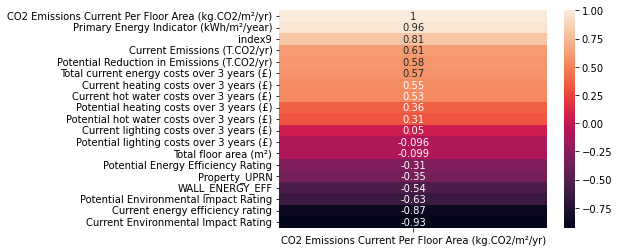

In [50]:
corrCO2 = dataframe.corr()[["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]].sort_values(by='CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)', ascending=False)
sns.heatmap(corrCO2, annot=True)

<AxesSubplot:>

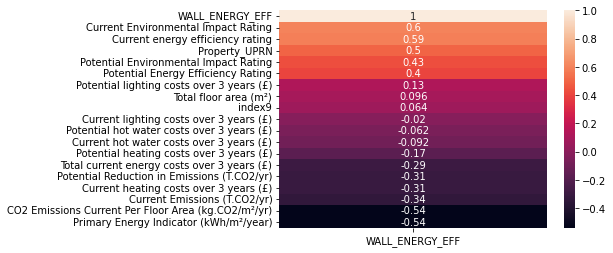

In [51]:
corrWallEff = dataframe.corr()[["WALL_ENERGY_EFF"]].sort_values(by='WALL_ENERGY_EFF', ascending=False)
sns.heatmap(corrWallEff, annot=True)

In [52]:
df_algo_1 = dataframe[["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)", "WALL_ENERGY_EFF","WALL_DESCRIPTION"]]

In [53]:
df_algo_1 = pd.get_dummies(df_algo_1, columns=['WALL_DESCRIPTION'])

In [54]:
corr_algo_1 = df_algo_1.corr()[["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]].sort_values(by='CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)', ascending=False)
corr_algo_1.head(25)

,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)
CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),1.000000
"WALL_DESCRIPTION_Sandstone or limestone, as built, no insulation (assumed)",0.147565
"WALL_DESCRIPTION_Granite or whinstone, as built, no insulation (assumed)",0.147330
"WALL_DESCRIPTION_Cavity wall, as built, no insulation (assumed)",0.133198
"WALL_DESCRIPTION_Cavity wall, as built, no insulation (assumed) | Sandstone or limestone, as built, no insulation (assumed)",0.098835
"WALL_DESCRIPTION_Sandstone or limestone, as built, no insulation (assumed) | Solid brick, as built, no insulation (assumed)",0.095882
"WALL_DESCRIPTION_Cavity wall, as built, no insulation (assumed) | Granite or whinstone, as built, no insulation (assumed)",0.084978
"WALL_DESCRIPTION_System built, as built, no insulation (assumed)",0.084660
"WALL_DESCRIPTION_Granite or whinstone, as built, no insulation (assumed) | Solid brick, as built, no insulation (assumed)",0.080292
"WALL_DESCRIPTION_Solid brick, as built, no insulation (assumed)",0.075816


In [55]:
corr_algo_1.tail(25)

,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)
"WALL_DESCRIPTION_Cavity wall, as built, insulated (assumed) | Timber frame, as built, insulated (assumed)",-0.024844
WALL_DESCRIPTION_Average thermal transmittance 0.12 W/m²K,-0.024912
"WALL_DESCRIPTION_System built, as built, no insulation (assumed) | System built, with external insulation",-0.024974
"WALL_DESCRIPTION_Cavity wall, as built, insulated (assumed) | Solid brick, as built, insulated (assumed)",-0.025952
WALL_DESCRIPTION_Average thermal transmittance 0.24 W/m²K,-0.026359
WALL_DESCRIPTION_Average thermal transmittance 0.11 W/m²K,-0.027116
WALL_DESCRIPTION_Average thermal transmittance 0.22 W/mÂ²K,-0.030017
WALL_DESCRIPTION_Average thermal transmittance 0.25 W/m²K,-0.030343
WALL_DESCRIPTION_Average thermal transmittance 0.23 W/m²K,-0.039062
WALL_DESCRIPTION_Average thermal transmittance 0.13 W/m²K,-0.043661


2 Build and algorithm to find correlations between CO2 emissions current per floor area vs roof description and roof energy efficiency - (5 points)

In [56]:
df_algo_2 = dataframe[["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)", "ROOF_ENERGY_EFF","ROOF_DESCRIPTION"]]
df_algo_2 = pd.get_dummies(df_algo_2, columns=['ROOF_DESCRIPTION'])
corr_algo_2 = df_algo_2.corr()[["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]].sort_values(by='CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)', ascending=False)
corr_algo_2.head(25)

,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)
CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),1.000000
"ROOF_DESCRIPTION_Pitched, no insulation (assumed)",0.170423
"ROOF_DESCRIPTION_Pitched, no insulation (assumed) | Roof room(s), no insulation (assumed)",0.109249
"ROOF_DESCRIPTION_Roof room(s), no insulation (assumed)",0.096822
"ROOF_DESCRIPTION_Pitched, no insulation (assumed)",0.090895
"ROOF_DESCRIPTION_Pitched, no insulation",0.089627
"ROOF_DESCRIPTION_Flat, no insulation (assumed)",0.061669
"ROOF_DESCRIPTION_Pitched, 100 mm loft insulation",0.059501
"ROOF_DESCRIPTION_Roof room(s), ceiling insulated",0.057374
"ROOF_DESCRIPTION_Pitched, limited insulation (assumed)",0.057124


In [57]:
corr_algo_2.tail(25)

,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)
ROOF_DESCRIPTION_Average thermal transmittance 0.07 W/m²K,-0.020449
ROOF_DESCRIPTION_Average thermal transmittance 0.15 W/mÂ²K,-0.021004
"ROOF_DESCRIPTION_Flat, insulated (assumed)",-0.022001
ROOF_DESCRIPTION_Average thermal transmittance 0.10 W/mÂ²K,-0.023086
ROOF_DESCRIPTION_Average thermal transmittance 0.1 W/m²K,-0.027601
"ROOF_DESCRIPTION_Pitched, 400+ mm loft insulation",-0.028157
ROOF_DESCRIPTION_(another dwelling above),-0.030751
ROOF_DESCRIPTION_Average thermal transmittance 0.08 W/m²K,-0.035884
ROOF_DESCRIPTION_Average thermal transmittance 0.12 W/m²K,-0.037202
ROOF_DESCRIPTION_Average thermal transmittance 0.09 W/m²K,-0.037888


3 Build and algorithm to find correlations between construction age band vs current energy efficiency and current emissions (T.CO2/yr) - (5 points)

In [58]:
df_algo_3 = dataframe[["Current Emissions (T.CO2/yr)", "Current energy efficiency rating","Part 1 Construction Age Band"]]
df_algo_3 = pd.get_dummies(df_algo_3, columns=['Part 1 Construction Age Band'])
corr_algo_3 = df_algo_3.corr()[["Current Emissions (T.CO2/yr)"]].sort_values(by='Current Emissions (T.CO2/yr)', ascending=False)
corr_algo_3.head(25)

,Current Emissions (T.CO2/yr)
Current Emissions (T.CO2/yr),1.000000
Part 1 Construction Age Band_before 1919,0.269476
Part 1 Construction Age Band_1919-1929,0.043787
Part 1 Construction Age Band_1930-1949,0.039775
Part 1 Construction Age Band_1965-1975,0.032173
Part 1 Construction Age Band_1950-1964,0.021660
Part 1 Construction Age Band_1976-1983,0.003980
Part 1 Construction Age Band_1999-2002,-0.021283
Part 1 Construction Age Band_1992-1998,-0.022020
Part 1 Construction Age Band_1984-1991,-0.022652


In [59]:
corr_algo_3.tail(25)

,Current Emissions (T.CO2/yr)
Current Emissions (T.CO2/yr),1.000000
Part 1 Construction Age Band_before 1919,0.269476
Part 1 Construction Age Band_1919-1929,0.043787
Part 1 Construction Age Band_1930-1949,0.039775
Part 1 Construction Age Band_1965-1975,0.032173
Part 1 Construction Age Band_1950-1964,0.021660
Part 1 Construction Age Band_1976-1983,0.003980
Part 1 Construction Age Band_1999-2002,-0.021283
Part 1 Construction Age Band_1992-1998,-0.022020
Part 1 Construction Age Band_1984-1991,-0.022652
